In [34]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import math
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
import statistics as st
import matplotlib
import astropy.coordinates as asc
import scipy.stats as stat
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.7, Om0=0.307)

t = Table.read('table_final.fits')

mstar = t['mstar']
sfr = t['SFR']
radio_lum = t['L888_new']
z = t['zfinal_new']
ang_size = t['Size']
phy_size = t['ang_size_new']

wise = (t['grg'] == False) & (t['agn_wise'] == True)

w1 = t['w1mpro_allw']
w2 = t['w2mpro_allw']
w3 = t['w3mpro_allw']
w4 = t['w4mpro_allw']

w1w2 = w1-w2
w2w3 = w2-w3
grg = t['grg']

In [48]:
w1w2_sel = w1w2[np.where(w1w2<=0.7)]
w2w3_1 = grg[np.where((w2w3>0) & (w2w3<1.6) & (w1w2<=0.7) & (t['grg'] == True))]
w2w3_2 = grg[np.where((w2w3>1.6) & (w2w3<3.4) & (w1w2<=0.7) & (t['grg'] == True))]
w2w3_3 = grg[np.where((w2w3>3.4) & (w1w2<=0.7) & (t['grg'] == True))]

In [50]:
len(w2w3_3)

14

In [41]:
w2w3_2grg

True
False
False
False
False
False
False
True
True
False
False


In [55]:
from scipy import stats

t1 = Table.read('SFR_table.fits')
sfr1 = t1['SFR']

t2 = Table.read('mstar_table.fits')
mstar1 = t2['mstar']

grg_sfr = sfr1[np.where(t1['grg'] == True)]
wise_sfr = sfr1[np.where((t1['grg'] == False) & (t1['agn_wise'] == True))]
grg_sm = mstar1[np.where(t2['grg'] == True)]
wise_sm = mstar1[np.where((t2['grg'] == False) & (t2['agn_wise'] == True))]

In [57]:
#KS_sfr
stats.ks_2samp(grg_sfr, wise_sfr)

KstestResult(statistic=0.7147511848341233, pvalue=6.661338147750939e-16)

In [58]:
#KS_sm
stats.ks_2samp(grg_sm, wise_sm)

KstestResult(statistic=0.2841308668399327, pvalue=7.747024800630609e-05)

In [78]:
import scipy.stats as stat
z = t['zfinal_new']

z_wise = z[np.where((t['agn_wise'] == True) & (z > 0))]
#st.mean(z_wise)
stat.sem(z_wise)

0.00972410771023542

In [75]:
len(z_wise)

2972

In [95]:
K_band =  t['mag_K_prof']
k_wise = K_band[np.where((t['grg'] == False) & (t['agn_wise'] == True))]
k_grg = K_band[np.where(t['grg'] == True)]

In [104]:
#k_wise2 = k_wise[np.where(k_wise>0)]
k_grg2 = k_grg[np.where(k_grg>0)]

In [106]:
#st.mean(k_grg2)
stat.sem(k_grg2)

0.20523683245027183

In [2]:
sfr =  t['SFR']
mstar = t['mstar']
sfr_wise = sfr[np.where((t['grg'] == False) & (t['agn_wise'] == True))]
sfr_grg = sfr[np.where(t['grg'] == True)]
mstar_wise = mstar[np.where((t['grg'] == False) & (t['agn_wise'] == True))]
mstar_grg = mstar[np.where(t['grg'] == True)]

In [10]:
sfr_g = sfr_grg[np.where(sfr_grg>0)]
st.mean(sfr_g)
stat.sem(sfr_g)

8.911963560227203

In [15]:
sm_g = mstar_grg[np.where(mstar_grg>0)]
sm_grg = np.log10(sm_g)

In [17]:
#st.mean(sm_grg)
stat.sem(sm_grg)

0.06615801620172757

In [19]:
sm_w = mstar_wise[np.where(mstar_wise>0)]
sm_wise = np.log10(sm_w)

In [21]:
#st.mean(sm_wise)
stat.sem(sm_wise)

0.014911285406326859

11.15615
10.363819
10.339338
10.601035
10.3831
11.370677
11.587507
11.105148
10.85162
10.243117
11.18834


In [150]:
asc.Distance(z=0.23)

<Distance 1184.01657566 Mpc>

In [125]:
r =  t['mag_r_prof']
g =  t['mag_g_prof']
z = t['zfinal_new']
#r_grg = r[np.where(t['grg'] == True)]
#len(r_grg)

#z_grg = z[np.where(t['grg'] == True)]
#len(z_grg)
gr = g-r

dist = asc.Distance(z=z).to(u.pc).value
#len(dist)

absR = r - 5*(np.log10(dist)) + 5

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2246: RuntimeWarning: invalid value encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)


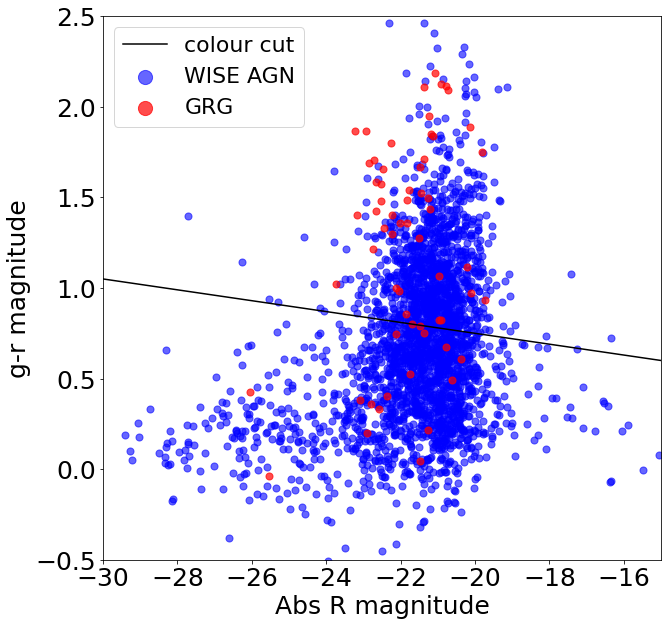

In [126]:
r_grg = absR[np.where(t['grg'] == True)]
r_wise = absR[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

gr_grg = gr[np.where(t['grg'] == True)]
gr_wise = gr[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

x = np.linspace(-30,-15,100)
y = 0.15 - 0.03*x

fig = plt.figure(figsize=(10,10))

plt.scatter(r_wise,gr_wise,s=50,c='blue',alpha=0.6,label='WISE AGN')
plt.scatter(r_grg,gr_grg,s=50,c='red',alpha=0.7,label='GRG')
plt.plot(x, y, color="black", label='colour cut')

plt.ylabel('g-r magnitude',fontsize=25)
plt.xlabel('Abs R magnitude',fontsize=25)
plt.ylim(-0.5,2.5)
plt.xlim(-30,-15)
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.legend(fontsize=22,markerscale=2)
plt.savefig('gr-absr.png',bbox_inches="tight")

C:\Users\HP\AppData\Local\Temp/ipykernel_17912/1379791657.py:5: RuntimeWarning: invalid value encountered in log10
  wise_sm2 = np.log10(wise_sm)


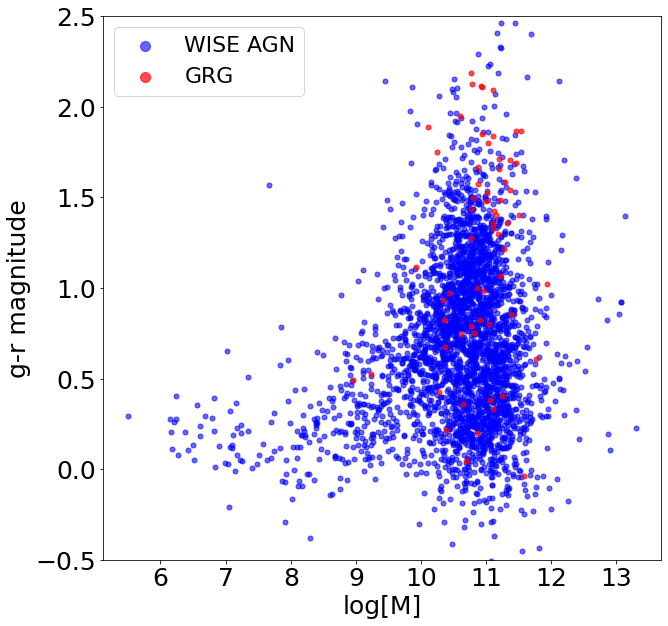

In [154]:
grg_sm = mstar[np.where(t['grg'] == True)]
wise_sm = mstar[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

grg_sm2 = np.log10(grg_sm)
wise_sm2 = np.log10(wise_sm)

r_grg = absR[np.where(t['grg'] == True)]
r_wise = absR[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

gr_grg = gr[np.where(t['grg'] == True)]
gr_wise = gr[np.where((t['grg'] == False) & (t['agn_wise'] == True))]


#x = np.linspace(-30,-12,100)
#y = 0.15 - 0.03*x

plt.clf
fig = plt.figure(figsize=(10,10))

plt.scatter(wise_sm2,gr_wise,s=25,c='blue',alpha=0.6,label='WISE AGN')
plt.scatter(grg_sm2,gr_grg,s=25,c='red',alpha=0.7,label='GRG')
#plt.plot(x, y, color="black", label='colour cut')

plt.ylabel('g-r magnitude',fontsize=25)
plt.xlabel('log[M]',fontsize=25)
plt.ylim(-0.5,2.5)
#plt.xlim(0,0.5)
#plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.legend(fontsize=22,markerscale=2)
plt.savefig('gr-sm.png',bbox_inches="tight")

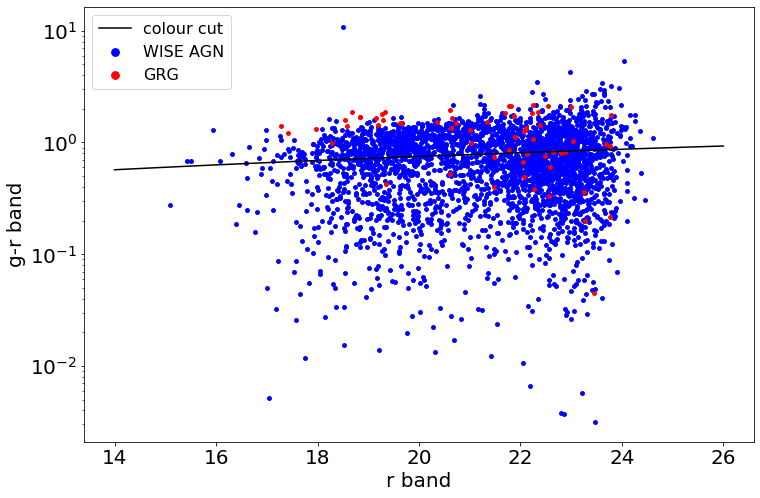

In [217]:
r_band =  t['mag_r_prof']
g_band =  t['mag_g_prof']
gr = g_band - r_band

r_grg = np.where(t['grg'] == True,r_band,np.nan)
r_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),r_band,np.nan)

gr_grg = np.where(t['grg'] == True,gr,np.nan)
gr_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),gr,np.nan)

x = np.linspace(14,26,100)
y = 0.15 + 0.03*x

fig = plt.figure(figsize=(12,8))

plt.scatter(r_wise,gr_wise,s=15,c='blue',label='WISE AGN')
plt.scatter(r_grg,gr_grg,s=15,c='red',label='GRG')
plt.plot(x, y, color="black", label='colour cut')

plt.ylabel('g-r band',fontsize=20)
plt.xlabel('r band',fontsize=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.yscale('log')
#plt.xscale('log')
plt.legend(fontsize=16,markerscale=2)
plt.savefig('gr-r.png')


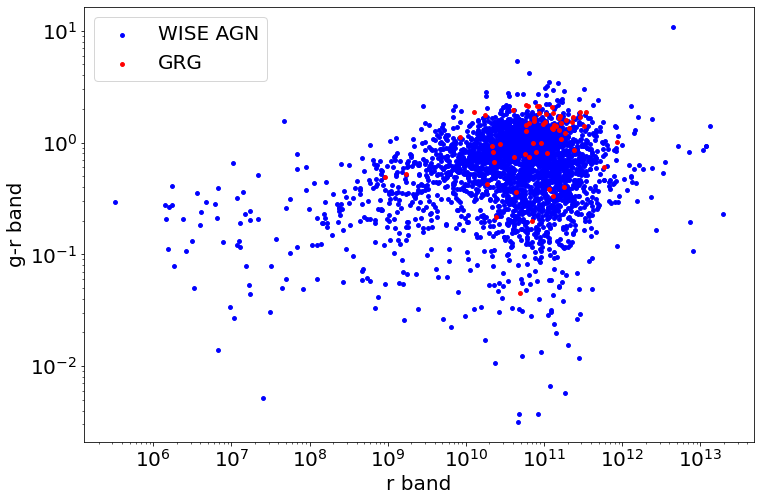

In [135]:
r_band =  t['mag_r_prof']
g_band =  t['mag_g_prof']
gr = g_band - r_band

r_grg = np.where(t['grg'] == True,r_band,np.nan)
r_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),r_band,np.nan)

gr_grg = np.where(t['grg'] == True,gr,np.nan)
gr_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),gr,np.nan)

grg_sm = np.where(t['grg'] == True,mstar,np.nan)
grg_sfr = np.where(t['grg'] == True,sfr,np.nan)

wise_sm = np.where((t['grg'] == False) & (t['agn_wise'] == True),mstar,np.nan)
wise_sfr = np.where((t['grg'] == False) & (t['agn_wise'] == True),sfr,np.nan)

plt.clf
fig = plt.figure(figsize=(12,8))

plt.scatter(wise_sm,gr_wise,s=15,c='blue',label='WISE AGN')
plt.scatter(grg_sm,gr_grg,s=15,c='red',label='GRG')
#plt.plot(x, y, color="black", label='colour cut')

plt.ylabel('g-r band',fontsize=20)
plt.xlabel('r band',fontsize=20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=20)
plt.savefig('gr-r.png')

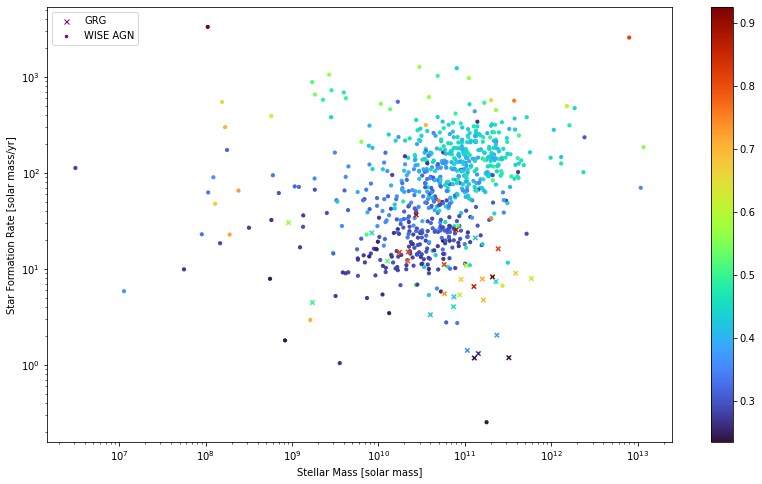

In [34]:
grg_x = np.where(t['grg'] == True,mstar,np.nan)
grg_y = np.where(t['grg'] == True,sfr,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),mstar,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),sfr,np.nan)

plt.clf
plt.figure(figsize=(14,8))
wise_plot = plt.scatter(wise_x,wise_y,s=10,c=z,cmap='turbo',label='WISE AGN')
grg_plot = plt.scatter(grg_x,grg_y,s=20,marker='x',c=z,cmap='turbo',label='GRG')
plt.ylabel('Star Formation Rate [solar mass/yr]')
plt.xlabel('Stellar Mass [solar mass]')
plt.yscale('log')
plt.xscale('log')

grg_leg = mlines.Line2D([], [], color='purple', marker='x', linestyle='None',
                          markersize=5, label='GRG')
wise_leg = mlines.Line2D([], [], color='purple', marker='.', linestyle='None',
                          markersize=5, label='WISE AGN')
plt.legend(handles=[grg_leg, wise_leg])
cbar = plt.colorbar()
#cbar.set_label('z', rotation=270)
#cmap = plt.cmap.gist_ncar
#colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))] 



plt.savefig('sfr-mstar-sm.png')

C:\Users\HP\AppData\Local\Temp/ipykernel_17912/3442724976.py:8: RuntimeWarning: invalid value encountered in log10
  wise_x2 = np.log10(wise_x)


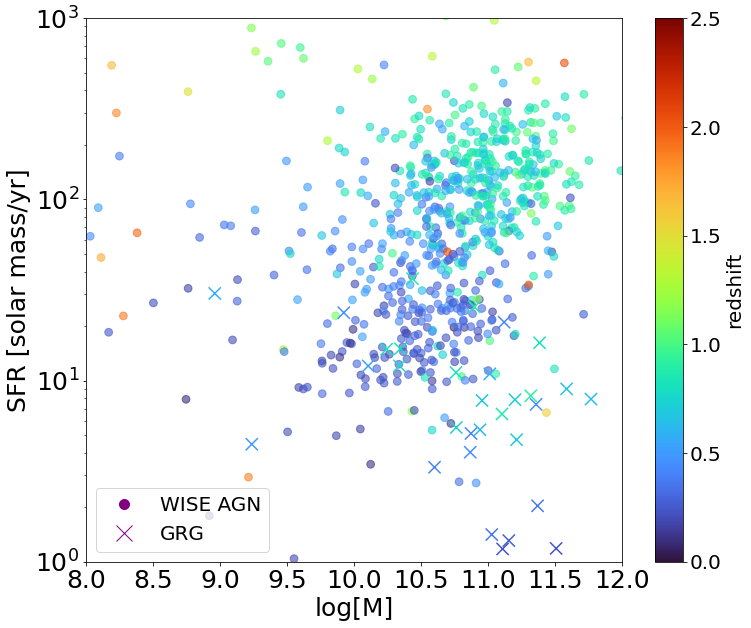

In [175]:
grg_x = np.where(t['grg'] == True,mstar,np.nan)
grg_y = np.where(t['grg'] == True,sfr,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),mstar,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),sfr,np.nan)

grg_x2 = np.log10(grg_x)
wise_x2 = np.log10(wise_x)


#z_min = np.min(z)
#z_max = np.max(z)
#step = (z_max - z_min) / 39812

t = z

plt.clf
normalize = matplotlib.colors.Normalize(vmin=0, vmax=2.5)
plt.figure(figsize=(12,10))
wise_plot = plt.scatter(wise_x2,wise_y,s=60,alpha=0.6,cmap='turbo',c=t,norm=normalize,label='WISE AGN')
grg_plot = plt.scatter(grg_x2,grg_y,s=150,marker='x',cmap='turbo',c=t,norm=normalize,label='GRG')
plt.ylabel('SFR [solar mass/yr]',fontsize=25)
plt.xlabel('log[M]',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)

plt.yscale('log')
#plt.xscale('log')
plt.ylim(1,10e2)
plt.xlim(8,12)
wise_leg = mlines.Line2D([], [], color='purple', marker='.', linestyle='None',
                          markersize=20, label='WISE AGN')
grg_leg = mlines.Line2D([], [], color='purple', marker='x', linestyle='None',
                          markersize=16, label='GRG')
plt.legend(handles=[wise_leg,grg_leg],fontsize=20,loc='lower left')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20)
cbar.set_label('redshift', rotation=90, fontsize = 20)
#cmap = plt.cmap.gist_ncar
#colorst = [colormap(i) for i in np.linspace(0, 0.9,len(ax.collections))] 

plt.savefig('sfr-mstar-z.png')

C:\Users\HP\AppData\Local\Temp/ipykernel_17912/3392644336.py:8: RuntimeWarning: invalid value encountered in log10
  wise_x2 = np.log10(wise_x)


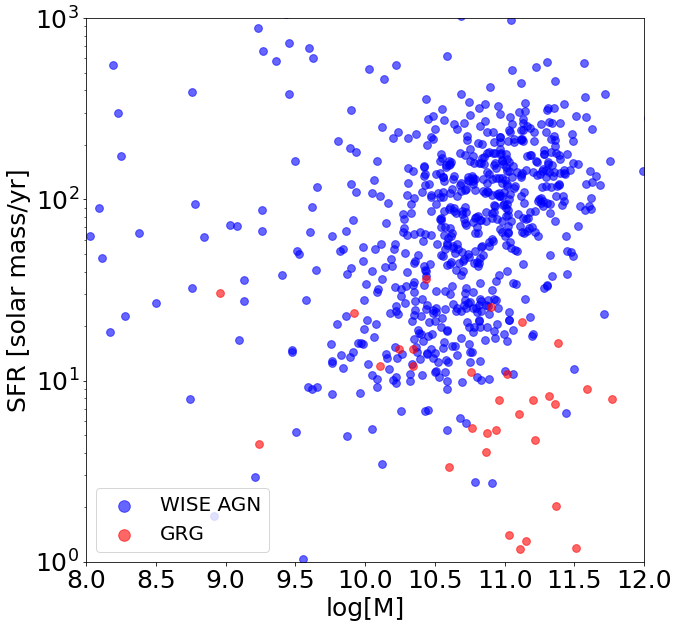

In [178]:
grg_x = np.where(t['grg'] == True,mstar,np.nan)
grg_y = np.where(t['grg'] == True,sfr,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),mstar,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),sfr,np.nan)

grg_x2 = np.log10(grg_x)
wise_x2 = np.log10(wise_x)

plt.clf
plt.figure(figsize=(10,10))
plt.scatter(wise_x2,wise_y,s=60,c='blue',alpha = 0.6,label='WISE AGN')
plt.scatter(grg_x2,grg_y,s=60,c='red',alpha = 0.6,label='GRG')
plt.ylabel('SFR [solar mass/yr]',fontsize=25)
plt.xlabel('log[M]',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.yscale('log')
#plt.xscale('log')
plt.ylim(1,10e2)
plt.xlim(8,12)
plt.legend(fontsize=20,markerscale=1.5,loc='lower left')
plt.savefig('sfr-mstar.png')

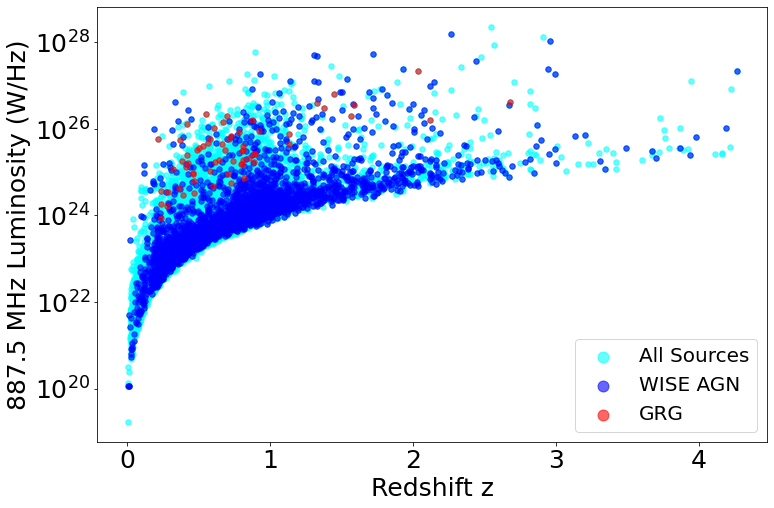

In [2]:
grg_x = np.where(t['grg'] == True,z,np.nan)
grg_y = np.where(t['grg'] == True,radio_lum,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),z,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),radio_lum,np.nan)

plt.clf
plt.figure(figsize=(12,8))
plt.scatter(z,radio_lum,s=30,c='cyan',alpha=0.6,label='All Sources')
plt.scatter(wise_x,wise_y,s=30,c='blue',alpha=0.6,label='WISE AGN')
plt.scatter(grg_x,grg_y,s=30,c='red',alpha=0.6,label='GRG')
plt.ylabel('887.5 MHz Luminosity (W/Hz)',fontsize=25)
plt.xlabel('Redshift z',fontsize=25)
plt.yscale('log')
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
#plt.xscale('log')
plt.legend(fontsize=20,markerscale=2)
plt.savefig('lum-z.png')

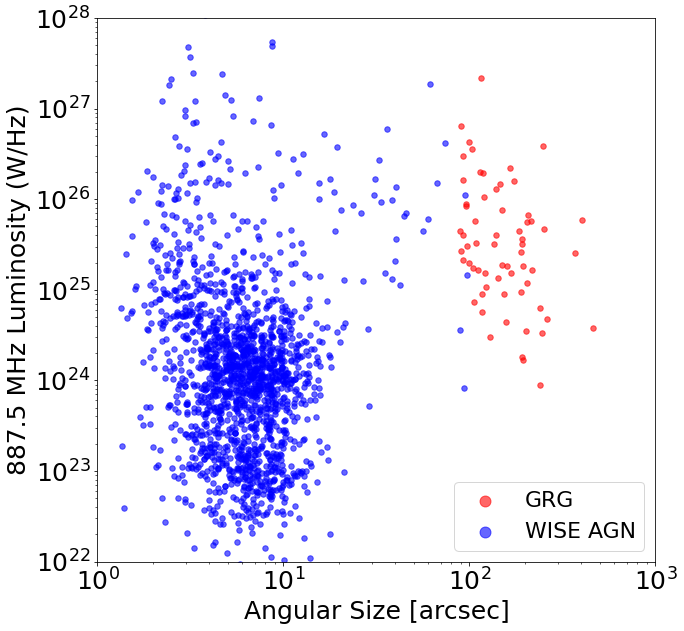

In [300]:
grg_x = np.where(t['grg'] == True,ang_size,np.nan)
grg_y = np.where(t['grg'] == True,radio_lum,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),ang_size,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),radio_lum,np.nan)

plt.clf
plt.figure(figsize=(10,10))
plt.scatter(grg_x,grg_y,s=30,alpha=0.6,c='red',label='GRG')
plt.scatter(wise_x,wise_y,s=30,alpha=0.6,c='blue',label='WISE AGN')
plt.ylabel('887.5 MHz Luminosity (W/Hz)',fontsize=25)
plt.xlabel('Angular Size [arcsec]',fontsize=25)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.ylim([10e21,10e27])
plt.xlim([1,1000])
plt.legend(fontsize=22,loc='lower right',markerscale=2)
plt.savefig('lum-angsize.png')

(1, 1000)

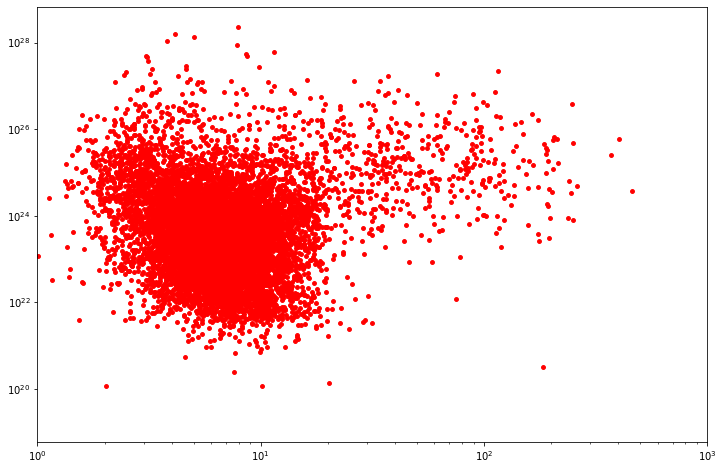

In [5]:
radio_lum = t['L888_new']
z = t['zfinal_new']
ang_size = t['Size']
phy_size

plt.clf
plt.figure(figsize=(12,8))
plt.scatter(ang_size,radio_lum,s=15,c='red',label='GRG')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1,1000])

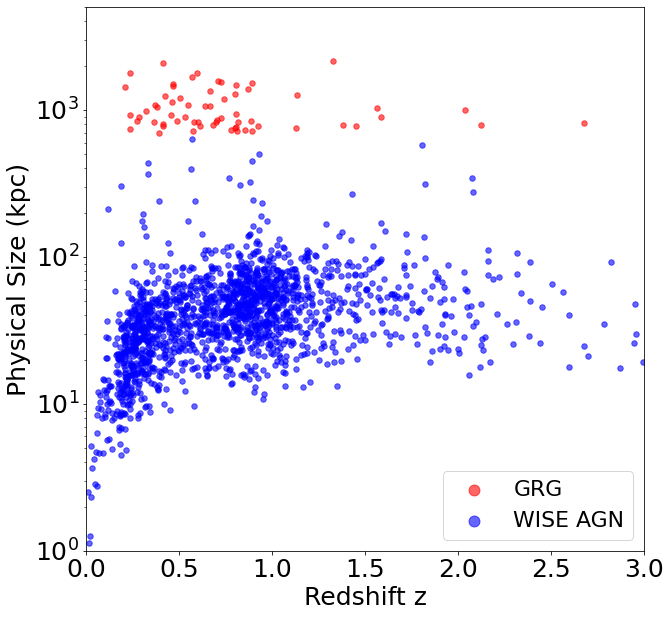

In [293]:
ang_size = t['Size']
phy_size = t['ang_size_new']

grg_size = phy_size[np.where(t['grg'] == True)]
wise_size = phy_size[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

grg_z = z[np.where(t['grg'] == True)]
wise_z = z[np.where((t['grg'] == False) & (t['agn_wise'] == True))]

#phy_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),phy_size,np.nan)
#phy_grg = np.where(t['grg'] == True,phy_size,np.nan)


plt.clf
plt.figure(figsize=(10,10))
plt.scatter(grg_z,grg_size,s=30,alpha=0.6,c='red',label='GRG')
plt.scatter(wise_z,wise_size,s=30,alpha=0.6,c='blue',label='WISE AGN')
plt.yscale('log')
#plt.xscale('log')
plt.ylim([1,5000])
plt.xlim([0,3])
plt.ylabel('Physical Size (kpc)',fontsize=25)
plt.xlabel('Redshift z',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.legend(fontsize=22,markerscale=2,loc='lower right')
plt.savefig('physize-z.png')

In [284]:
wise_size

--
634.9062892133676
230.96007264058989
212.39253667188942
--
138.25755377490145
176.74313019562925
579.4240293934345
244.60076186815527
--
240.7850545047645


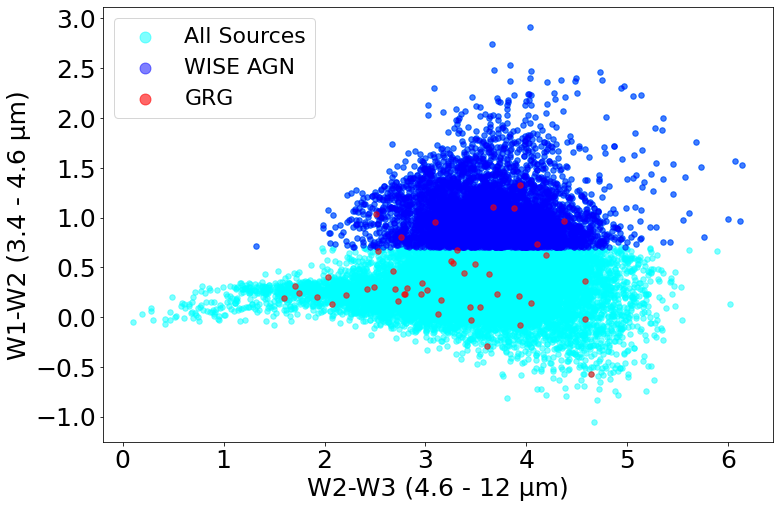

In [79]:
grg_x = np.where(t['grg'] == True,w2w3,np.nan)
grg_y = np.where(t['grg'] == True,w1w2,np.nan)

wise_x = np.where((t['grg'] == False) & (t['agn_wise'] == True),w2w3,np.nan)
wise_y = np.where((t['grg'] == False) & (t['agn_wise'] == True),w1w2,np.nan)

plt.clf
plt.figure(figsize=(12,8))
plt.scatter(w2w3,w1w2,s=30,c='cyan',alpha=0.5,label='All Sources')
plt.scatter(wise_x,wise_y,s=30,c='blue',alpha=0.5,label='WISE AGN')
plt.scatter(grg_x,grg_y,s=30,c='red',alpha=0.6,label='GRG')
plt.ylabel('W1-W2 (3.4 - 4.6 µm)',fontsize=25)
plt.xlabel('W2-W3 (4.6 - 12 µm)',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
#plt.yscale('log')
#plt.xscale('log')
plt.legend(fontsize=22,markerscale=2)
plt.savefig('wise-colour.png')

In [84]:
grg_w2w3 = np.where(t['grg'] == True,w2w3,np.nan)
grg_w1w2 = np.where(t['grg'] == True,w1w2,np.nan)

wise_w2w3 = w2w3[np.where((t['grg'] == False) & (t['agn_wise'] == True))]
wise_w1w2 = np.where((t['grg'] == False) & (t['agn_wise'] == True),w1w2,np.nan)

In [87]:
len(wise_w2w3)

5217

In [2]:
z =  t['zfinal_new'] > 0
tz = t[z]
len(tz)
redshift = tz['zfinal_new']

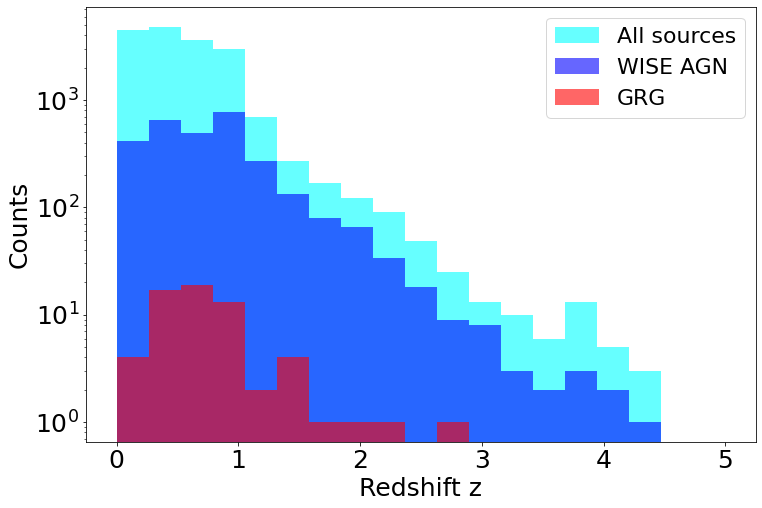

In [7]:
bins = np.linspace(0, 5, 20)
z_all = redshift
z_wise = np.where((tz['grg'] == False) & (tz['agn_wise'] == True),redshift,np.nan)
z_grg = np.where(tz['grg'] == True,redshift,np.nan)
#plt.hist([z_wise,z_grg],label=['AGN_Wise', 'GRG'])
fig = plt.figure(figsize=(12,8))
plt.hist(z_all, bins=bins, alpha =0.6, label='All sources', color = 'cyan')
plt.hist(z_wise, bins=bins, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(z_grg, bins=bins, alpha =0.6, label='GRG',  color = 'red')
plt.yscale('log')
plt.ylabel('Counts',fontsize=25)
plt.xlabel('Redshift z',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.legend(fontsize=22)
plt.savefig('z-hist.png')

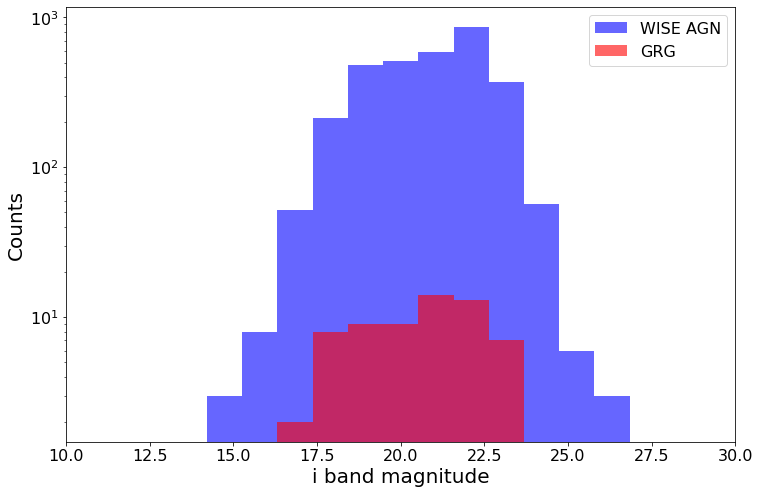

In [27]:
bins = np.linspace(10, 30, 20)

i_band =  t['mag_i_prof']
K_band =  t['mag_K_prof']

i_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),i_band,np.nan)
i_grg = np.where(t['grg'] == True,i_band,np.nan)
fig = plt.figure(figsize=(12,8))


#plt.hist([i_wise,i_grg],label=['AGN_Wise', 'GRG'], bins=20)
plt.hist(i_wise, bins=bins, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(i_grg, bins=bins, alpha =0.6, label='GRG',  color = 'red')

plt.xlim(10,30)
plt.yscale('log')
plt.ylabel('Counts',fontsize=20)
plt.xlabel('i band magnitude',fontsize=20)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize=16)
plt.savefig('i_hist.png')

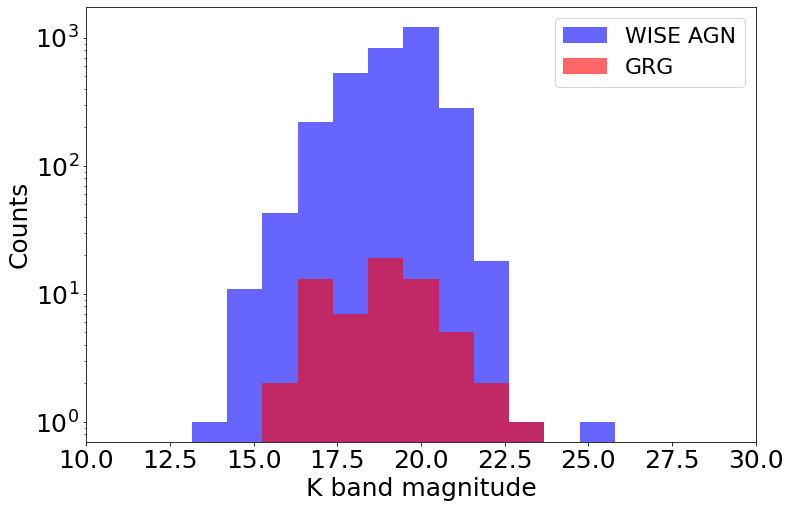

In [304]:
bins = np.linspace(10, 30, 20)

K_band =  t['mag_K_prof']
k_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),K_band,np.nan)
k_grg = np.where(t['grg'] == True,K_band,np.nan)
fig = plt.figure(figsize=(12,8))


#plt.hist([i_wise,i_grg],label=['AGN_Wise', 'GRG'], bins=20)
plt.hist(k_wise, bins=bins, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(k_grg, bins=bins, alpha =0.6, label='GRG',  color = 'red')

plt.xlim(10,30)
plt.yscale('log')
plt.ylabel('Counts',fontsize=25)
plt.xlabel('K band magnitude',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
plt.legend(fontsize=22)
plt.savefig('K_hist.png')

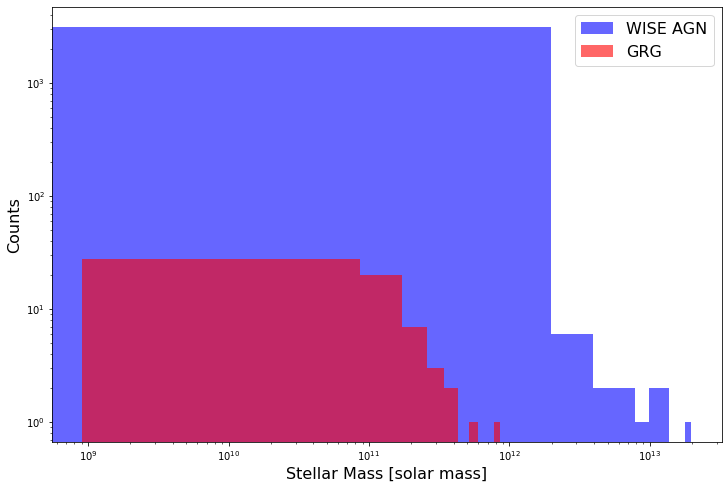

In [24]:
bins = np.linspace(10e9, 10e14, 50)
mstar = t['mstar']
mstar_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),mstar,np.nan)
mstar_grg = np.where(t['grg'] == True,mstar,np.nan)

plt.clf
fig = plt.figure(figsize=(12,8))
#plt.hist([K_wise,K_grg],label=['AGN_Wise', 'GRG'])
plt.hist(mstar_wise, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(mstar_grg, alpha =0.6, label='GRG',  color = 'red')


plt.yscale('log')
plt.xscale('log')
plt.ylabel('Counts',fontsize=16)
plt.xlabel('Stellar Mass [solar mass]',fontsize=16)
plt.legend(fontsize=16)
plt.savefig('Mstar.png')

In [38]:
ang_size =  t['Size']
phy_size =  t['ang_size_new']

In [42]:
t['Size'] > 0.1

array([ True,  True,  True, ..., False,  True,  True])

In [50]:
ang_size = t['Size']

In [51]:
ang_size =  t['Size'] > 0.1
valid = t[ang_size]
ang = valid['Size']
len(valid)

24447

In [49]:
bins = np.linspace(0.5, 500, 20)

ang_wise = ang[np.where((t['grg'] == False) & (t['agn_wise'] == True))]
ang_grg = ang[np.where(t['grg'] == True)]
fig = plt.figure(figsize=(12,8))
#plt.hist([ang_wise,ang_grg],bins = bins, label=['AGN_Wise', 'GRG'])
plt.hist(ang_wise, bins=bins, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(ang_grg, bins=bins, alpha =0.6, label='GRG',  color = 'red')
plt.yscale('log')
plt.ylabel('Counts',fontsize=16)
plt.xlabel('Angular Size (arcsec)',fontsize=16)
#plt.xlim(0.5,500)
plt.legend(fontsize=16)
plt.savefig('ang_size_hist_temp.png')

IndexError: index 24448 is out of bounds for axis 0 with size 24447

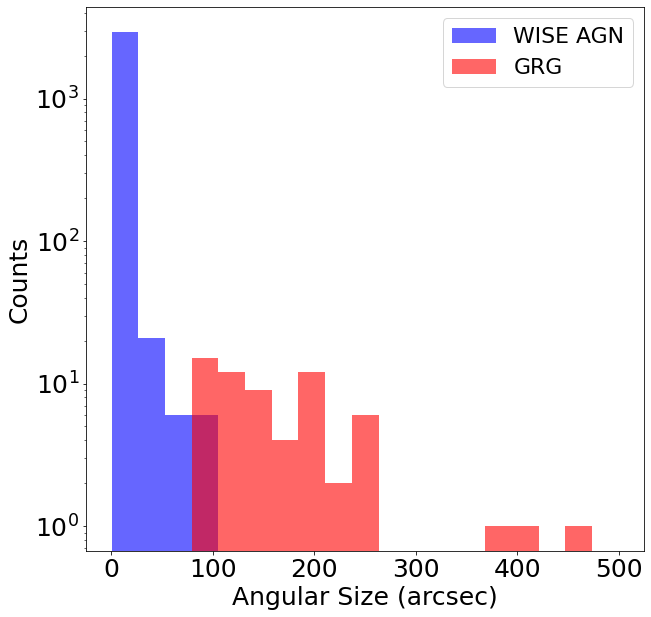

In [305]:
bins = np.linspace(0.5, 500, 20)

ang_wise = np.where((valid['grg'] == False) & (valid['agn_wise'] == True),ang,np.nan)
ang_grg = np.where(valid['grg'] == True ,ang,np.nan)
fig = plt.figure(figsize=(10,10))
#plt.hist([ang_wise,ang_grg],bins = bins, label=['AGN_Wise', 'GRG'])
plt.hist(ang_wise, bins=bins, alpha =0.6, label='WISE AGN', color = 'blue')
plt.hist(ang_grg, bins=bins, alpha =0.6, label='GRG',  color = 'red')
plt.yscale('log')
plt.ylabel('Counts',fontsize=25)
plt.xlabel('Angular Size (arcsec)',fontsize=25)
plt.xticks(fontsize= 25)
plt.yticks(fontsize= 25)
#plt.xlim(0.5,500)
plt.legend(fontsize=22)
plt.savefig('ang_size_hist.png')

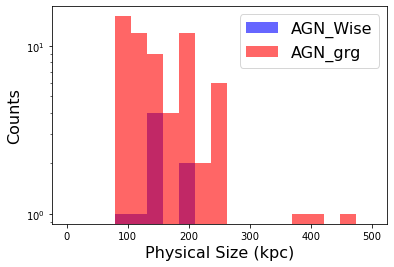

In [40]:
phy_wise = np.where((t['grg'] == False) & (t['agn_wise'] == True),phy_size,np.nan)
phy_grg = np.where(t['grg'] == True,phy_size,np.nan)


#plt.hist([phy_wise,phy_grg],label=['AGN_Wise', 'GRG'])
plt.hist(ang_wise, bins=bins, alpha =0.6, label='AGN_Wise', color = 'blue')
plt.hist(ang_grg, bins=bins, alpha =0.6, label='AGN_grg',  color = 'red')

plt.yscale('log')
plt.ylabel('Counts',fontsize=16)
plt.xlabel('Physical Size (kpc)',fontsize=16)
plt.legend(fontsize=16)
plt.savefig('phy_size_hist.png')